# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

#don't mix different indexes!

a    0.263173
b    0.243791
c   -0.072886
d    0.000185
e   -0.315170
dtype: float64
a         NaN
b    0.487582
c   -0.145772
d    0.000369
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [10]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time, differently from array indexes


2022-11-30 10:45:00    11.521199
2022-12-01 10:45:00    11.405199
2022-12-02 10:45:00     8.184925
2022-12-03 10:45:00    11.103821
Freq: D, dtype: float64 

2022-11-30 10:45:00    11.521199
2022-12-01 10:45:00    11.405199
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

MORE POWERFUL THAN NUMPY ARRAY: INDEXES, HETEROGENEOUS

COLUMNS HAVE NAMES, ROWS HAVE INDEXES, SO PERCEIVE THE COLUMNS AS THE VARIABLE WE CARE ABOUT

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [13]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
print(df)
df


                            A         B         C         D
2022-11-30 10:45:00  0.135578 -0.224728  0.095223 -1.064203
2022-11-30 11:45:00 -0.692904  1.831120  1.162546  0.389197
2022-11-30 12:45:00  0.201270  1.014641  1.583346 -1.161866
2022-11-30 13:45:00 -0.340741 -0.736617 -1.308812 -0.316794
2022-11-30 14:45:00  0.435788  0.828436  0.204953 -1.124324
2022-11-30 15:45:00 -1.448653 -1.165194  0.785867  0.026317
2022-11-30 16:45:00 -0.795845 -0.627809  1.429685 -0.189927
2022-11-30 17:45:00  1.621202  0.750150 -0.255863 -1.024918
2022-11-30 18:45:00  0.136554  0.856568  0.135476 -0.869184
2022-11-30 19:45:00  0.535762 -0.095458 -0.720980 -1.811550


,A,B,C,D
2022-11-30 10:45:00,0.135578,-0.224728,0.095223,-1.064203
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,0.389197
2022-11-30 12:45:00,0.201270,1.014641,1.583346,-1.161866
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,-0.316794
2022-11-30 14:45:00,0.435788,0.828436,0.204953,-1.124324
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,0.026317
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,-0.189927
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,-1.024918
2022-11-30 18:45:00,0.136554,0.856568,0.135476,-0.869184
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,-1.811550


or by means of a dictionary:


In [19]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [20]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,0.135578,-0.224728,0.095223,-1.064203
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,0.389197


In [21]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,-0.189927
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,-1.024918
2022-11-30 18:45:00,0.136554,0.856568,0.135476,-0.869184
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,-1.811550


In [24]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[ 0.13557823, -0.22472777,  0.09522287, -1.06420335],
       [-0.69290418,  1.83112022,  1.1625458 ,  0.38919747],
       [ 0.20127029,  1.01464052,  1.58334584, -1.16186586],
       [-0.34074148, -0.73661679, -1.30881167, -0.31679443],
       [ 0.43578835,  0.82843621,  0.20495344, -1.12432384],
       [-1.4486534 , -1.16519383,  0.78586747,  0.02631687],
       [-0.7958445 , -0.62780924,  1.42968525, -0.1899267 ],
       [ 1.621202  ,  0.75015031, -0.2558633 , -1.02491834],
       [ 0.13655378,  0.85656833,  0.13547608, -0.86918433],
       [ 0.53576205, -0.09545846, -0.72098021, -1.81154996]])

In [27]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.021199,0.243111,0.311144,-0.714725
std,0.850260,0.950336,0.938064,0.667873
min,-1.448653,-1.165194,-1.308812,-1.811550
25%,-0.604864,-0.527039,-0.168092,-1.109294
50%,0.136066,0.327346,0.170215,-0.947051
75%,0.377159,0.849535,1.068376,-0.221644
max,1.621202,1.831120,1.583346,0.389197


In [28]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,0.135578,-0.692904,0.201270,-0.340741,0.435788,-1.448653,-0.795845,1.621202,0.136554,0.535762
B,-0.224728,1.831120,1.014641,-0.736617,0.828436,-1.165194,-0.627809,0.750150,0.856568,-0.095458
C,0.095223,1.162546,1.583346,-1.308812,0.204953,0.785867,1.429685,-0.255863,0.135476,-0.720980
D,-1.064203,0.389197,-1.161866,-0.316794,-1.124324,0.026317,-0.189927,-1.024918,-0.869184,-1.811550


In [29]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2022-11-30 10:45:00,0.135578,-0.224728,0.095223,-1.064203
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,0.389197
2022-11-30 12:45:00,0.201270,1.014641,1.583346,-1.161866
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,-0.316794
2022-11-30 14:45:00,0.435788,0.828436,0.204953,-1.124324
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,0.026317
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,-0.189927
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,-1.024918
2022-11-30 18:45:00,0.136554,0.856568,0.135476,-0.869184
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,-1.811550


In [31]:
df.sort_values(by="C")
#and automatically sort the rows accordingly!

,A,B,C,D
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,-0.316794
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,-1.811550
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,-1.024918
2022-11-30 10:45:00,0.135578,-0.224728,0.095223,-1.064203
2022-11-30 18:45:00,0.136554,0.856568,0.135476,-0.869184
2022-11-30 14:45:00,0.435788,0.828436,0.204953,-1.124324
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,0.026317
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,0.389197
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,-0.189927
2022-11-30 12:45:00,0.201270,1.014641,1.583346,-1.161866


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [33]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column.. eg "A prime")
print (df.A)

2022-11-30 10:45:00    0.135578
2022-11-30 11:45:00   -0.692904
2022-11-30 12:45:00    0.201270
2022-11-30 13:45:00   -0.340741
2022-11-30 14:45:00    0.435788
2022-11-30 15:45:00   -1.448653
2022-11-30 16:45:00   -0.795845
2022-11-30 17:45:00    1.621202
2022-11-30 18:45:00    0.136554
2022-11-30 19:45:00    0.535762
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    0.135578
2022-11-30 11:45:00   -0.692904
2022-11-30 12:45:00    0.201270
2022-11-30 13:45:00   -0.340741
2022-11-30 14:45:00    0.435788
2022-11-30 15:45:00   -1.448653
2022-11-30 16:45:00   -0.795845
2022-11-30 17:45:00    1.621202
2022-11-30 18:45:00    0.136554
2022-11-30 19:45:00    0.535762
Freq: H, Name: A, dtype: float64


In [34]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00  0.135578 -0.224728  0.095223 -1.064203
2022-11-30 11:45:00 -0.692904  1.831120  1.162546  0.389197
2022-11-30 12:45:00  0.201270  1.014641  1.583346 -1.161866
                            A         B         C         D
2022-11-30 10:45:00  0.135578 -0.224728  0.095223 -1.064203
2022-11-30 11:45:00 -0.692904  1.831120  1.162546  0.389197
2022-11-30 12:45:00  0.201270  1.014641  1.583346 -1.161866


### Selection by label

In [36]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

#is getting a single row

A    0.135578
B   -0.224728
C    0.095223
D   -1.064203
Name: 2022-11-30 10:45:00, dtype: float64

In [40]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']] #list of indexes, columns
#a=df.loc[:,['A','B']]

#usually dont want to create a copy for memory issues, rather renaming

,A,B
2022-11-30 10:45:00,0.135578,-0.224728
2022-11-30 11:45:00,-0.692904,1.831120
2022-11-30 12:45:00,0.201270,1.014641
2022-11-30 13:45:00,-0.340741,-0.736617
2022-11-30 14:45:00,0.435788,0.828436
2022-11-30 15:45:00,-1.448653,-1.165194
2022-11-30 16:45:00,-0.795845,-0.627809
2022-11-30 17:45:00,1.621202,0.750150
2022-11-30 18:45:00,0.136554,0.856568
2022-11-30 19:45:00,0.535762,-0.095458


In [41]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,0.435788,0.828436
2022-11-30 15:45:00,-1.448653,-1.165194
2022-11-30 16:45:00,-0.795845,-0.627809


In [42]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.6929041837226811
-0.6929041837226811


### Selecting by position

In [44]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

#convenient if don't know the actual value, but the indexing

A   -0.340741
B   -0.736617
C   -1.308812
D   -0.316794
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00 -0.340741 -0.736617
2022-11-30 14:45:00  0.435788  0.828436


In [45]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.692904,1.162546
2022-11-30 12:45:00,0.201270,1.583346
2022-11-30 14:45:00,0.435788,0.204953


In [46]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.692904  1.831120  1.162546  0.389197
2022-11-30 12:45:00  0.201270  1.014641  1.583346 -1.161866 

                            B         C
2022-11-30 10:45:00 -0.224728  0.095223
2022-11-30 11:45:00  1.831120  1.162546
2022-11-30 12:45:00  1.014641  1.583346
2022-11-30 13:45:00 -0.736617 -1.308812
2022-11-30 14:45:00  0.828436  0.204953
2022-11-30 15:45:00 -1.165194  0.785867
2022-11-30 16:45:00 -0.627809  1.429685
2022-11-30 17:45:00  0.750150 -0.255863
2022-11-30 18:45:00  0.856568  0.135476
2022-11-30 19:45:00 -0.095458 -0.720980


In [47]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


1.8311202196220726

### Boolean index

#### Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [49]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

#rows for which the element B is positive, very convenient!

,A,B,C,D
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,0.389197
2022-11-30 12:45:00,0.201270,1.014641,1.583346,-1.161866
2022-11-30 14:45:00,0.435788,0.828436,0.204953,-1.124324
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,-1.024918
2022-11-30 18:45:00,0.136554,0.856568,0.135476,-0.869184


In [50]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,0.135578,NaN,0.095223,NaN
2022-11-30 11:45:00,NaN,1.831120,1.162546,0.389197
2022-11-30 12:45:00,0.201270,1.014641,1.583346,NaN
2022-11-30 13:45:00,NaN,NaN,NaN,NaN
2022-11-30 14:45:00,0.435788,0.828436,0.204953,NaN
2022-11-30 15:45:00,NaN,NaN,0.785867,0.026317
2022-11-30 16:45:00,NaN,NaN,1.429685,NaN
2022-11-30 17:45:00,1.621202,0.750150,NaN,NaN
2022-11-30 18:45:00,0.136554,0.856568,0.135476,NaN
2022-11-30 19:45:00,0.535762,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [56]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [58]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,5,0.5,2,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,12,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,14,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16,0.997564
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,18,0.996917


In [59]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,-0.095223,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.692904,-1.831120,-1.162546,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-0.201270,-1.014641,-1.583346,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.435788,-0.828436,-0.204953,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,-0.785867,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,-1.429685,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-1.621202,-0.750150,-0.255863,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-0.136554,-0.856568,-0.135476,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-0.535762,-0.095458,-0.720980,-5,-4.5,-18,-0.996917


In [60]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,5,0.5,2,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,12,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,14,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16,0.997564
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [61]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,1.000000
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,5,0.5,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,5,1.5,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,0.997564
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,0.996917


In [62]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,12,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,14,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16,0.997564
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,18,0.996917


In [63]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,5,0.5,2,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,12,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,14,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16,0.997564
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,18,0.996917


In [64]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,5,0.5,2,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,12,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,14,0.998135
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [65]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,NaN,0.095223,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.831120,1.162546,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4.0,0.999848
2022-11-30 13:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8.0,0.999391
2022-11-30 15:45:00,NaN,NaN,0.785867,5,2.5,10.0,0.999048
2022-11-30 16:45:00,NaN,NaN,1.429685,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.621202,0.750150,NaN,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.535762,NaN,NaN,5,4.5,18.0,0.996917


In [66]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4.0,0.999848
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8.0,0.999391
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16.0,0.997564


In [67]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,True,False,False,True,True,False
2022-11-30 11:45:00,True,False,False,False,False,False,False
2022-11-30 12:45:00,False,False,False,False,False,False,False
2022-11-30 13:45:00,True,True,True,False,False,False,False
2022-11-30 14:45:00,False,False,False,False,False,False,False
2022-11-30 15:45:00,True,True,False,False,False,False,False
2022-11-30 16:45:00,True,True,False,False,False,False,False
2022-11-30 17:45:00,False,False,True,False,False,False,False
2022-11-30 18:45:00,False,False,False,False,False,False,False
2022-11-30 19:45:00,False,True,True,False,False,False,False


In [68]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.000000,0.095223,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,1.831120,1.162546,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.000000,0.000000,0.785867,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.000000,0.000000,1.429685,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.621202,0.750150,0.000000,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.535762,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:
FANCY, DON'T KNOW WHEN USEFUL

In [70]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,NaN,0.095223,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.831120,1.162546,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.201270,1.014641,1.583346,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.435788,0.828436,0.785867,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.435788,0.828436,1.429685,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.621202,0.750150,1.429685,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.535762,0.856568,0.135476,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [72]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns; typically doesn't make sense
print (df.mean(axis=1),'\n')

A         -0.034757
B          0.243111
C          0.311144
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.838642
2022-11-30 11:45:00    1.542961
2022-11-30 12:45:00    1.971301
2022-11-30 13:45:00    1.587641
2022-11-30 14:45:00    2.495510
2022-11-30 15:45:00    2.381581
2022-11-30 16:45:00    3.000666
2022-11-30 17:45:00    3.659089
2022-11-30 18:45:00    3.875166
2022-11-30 19:45:00    4.030892
Freq: H, dtype: float64 



In [74]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.692904,1.606392,1.257769,10,0.5,2,1.999962
2022-11-30 12:45:00,-0.491634,2.621033,2.841115,15,1.5,6,2.999810
2022-11-30 13:45:00,-0.832375,1.884416,1.532303,20,3.0,12,3.999467
2022-11-30 14:45:00,-0.396587,2.712852,1.737256,25,5.0,20,4.998858
2022-11-30 15:45:00,-1.845240,1.547659,2.523124,30,7.5,30,5.997906
2022-11-30 16:45:00,-2.641085,0.919849,3.952809,35,10.5,42,6.996536
2022-11-30 17:45:00,-1.019883,1.670000,3.696946,40,14.0,56,7.994670
2022-11-30 18:45:00,-0.883329,2.526568,3.832422,45,18.0,72,8.992234
2022-11-30 19:45:00,-0.347567,2.431110,3.111442,50,22.5,90,9.989152


In [76]:
#it's only temporary
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.224728,0.095223,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.692904,1.831120,1.162546,5,0.5,2,0.999962
2022-11-30 12:45:00,0.201270,1.014641,1.583346,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.340741,-0.736617,-1.308812,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435788,0.828436,0.204953,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.448653,-1.165194,0.785867,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.795845,-0.627809,1.429685,5,3.0,12,0.998630
2022-11-30 17:45:00,1.621202,0.750150,-0.255863,5,3.5,14,0.998135
2022-11-30 18:45:00,0.136554,0.856568,0.135476,5,4.0,16,0.997564
2022-11-30 19:45:00,0.535762,-0.095458,-0.720980,5,4.5,18,0.996917


In [77]:
df.apply(lambda x: x.max() - x.min())

A           3.069855
B           2.996314
C           2.892158
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [78]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00   -0.224728
2022-11-30 11:45:00    1.138216
2022-11-30 12:45:00    1.215911
2022-11-30 13:45:00   -1.077358
2022-11-30 14:45:00    1.264225
2022-11-30 15:45:00   -2.613847
2022-11-30 16:45:00   -1.423654
2022-11-30 17:45:00    2.371352
2022-11-30 18:45:00    0.993122
2022-11-30 19:45:00    0.440304
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [79]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

--2022-11-30 11:52:57--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-11-30 11:52:58--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdf897054174f71859a5828e8bb.dl.dropboxusercontent.com/cd/0/inline/Bxur9GhBGygWtYeBIGllTxoJMdA5XlUcSb9a_67Ya-6DqL3L2eVZ3VBr2nUicJG7hSXJHgMdBkr60mVs568ZFM5QGHwVXEP1ONNL86Ct3LMkATcQHuqiOxWvGzkbCjr1j3NZi8VkaOHAwFWlkYu2bC_SnplPtGIHeTLijJ7ejWEa7g/file# [following]
--2022-11-30 11:52:58--  https://ucdf897054174f71859a5828e8bb.dl.dropboxusercontent.com/cd/0/inline/Bxur9GhBGygWtYeBIGllTxoJMdA5XlUcSb9a_67Ya-6DqL3L2eVZ3VBr2nUicJG7hSXJ

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [82]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

#vectorial analysis: op on columns are managed by pandas in a very efficienty way by the backend!!!
#data is arranged efficiently in memory

In [83]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [84]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [85]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.118426,0.397327,0.503855,0.118065
1,-0.959655,0.036940,-0.206955,0.001670
2,0.100412,-0.316901,-0.044873,-1.755233
3,-0.322818,-0.483940,-0.246205,0.506292
4,0.597130,-0.624313,0.963852,-0.511604
5,-0.521344,0.139218,-1.381774,-2.626000
6,-0.114563,0.443651,-1.302591,-0.175404
7,-0.324463,1.965676,-0.827474,-0.161480
8,-0.787560,0.088717,0.423826,-1.128696
9,-1.935431,-0.664071,-0.725179,-0.019622


In [86]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.118426  0.397327  0.503855  0.118065
 1 -0.959655  0.036940 -0.206955  0.001670
 2  0.100412 -0.316901 -0.044873 -1.755233,
           0         1         2         3
 3 -0.322818 -0.483940 -0.246205  0.506292
 4  0.597130 -0.624313  0.963852 -0.511604
 5 -0.521344  0.139218 -1.381774 -2.626000
 6 -0.114563  0.443651 -1.302591 -0.175404,
           0         1         2         3
 7 -0.324463  1.965676 -0.827474 -0.161480
 8 -0.787560  0.088717  0.423826 -1.128696
 9 -1.935431 -0.664071 -0.725179 -0.019622]

In [ ]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. 
#### This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [88]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [89]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.100374,-0.267427
1,bar,one,0.759536,1.388430
2,foo,two,0.896252,-1.652531
3,bar,three,0.395854,-0.177315
4,foo,two,0.962955,0.266969
5,bar,two,0.202617,0.013330
6,foo,one,1.373598,0.587355
7,foo,three,0.966557,0.099432


In [90]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

/tmp/ipykernel_8029/2296005771.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby('A').sum()


,C,D
A,,
bar,1.358007,1.224446
foo,4.098988,-0.966202


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [91]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.900189
       two       1.414772
baz    one      -0.230400
       two       0.493463
foo    one       2.040124
       two       0.933428
qux    one      -0.243849
       two       0.320373
dtype: float64


In [92]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.759536  1.388430
    three  0.395854 -0.177315
    two    0.202617  0.013330
foo one    1.273224  0.319929
    three  0.966557  0.099432
    two    1.859207 -1.385562

In [93]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.759536
            D    1.388430
     three  C    0.395854
            D   -0.177315
     two    C    0.202617
            D    0.013330
foo  one    C    1.273224
            D    0.319929
     three  C    0.966557
            D    0.099432
     two    C    1.859207
            D   -1.385562
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

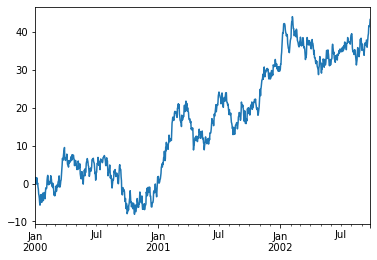

In [94]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

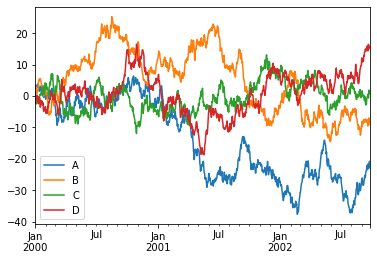

In [95]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')